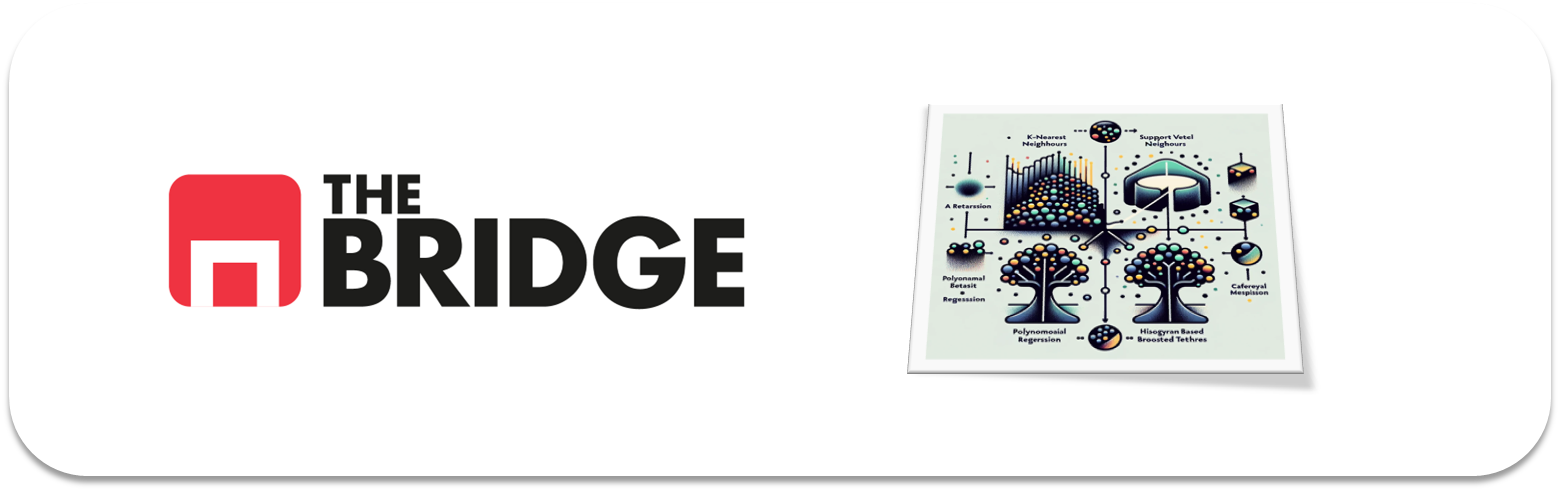

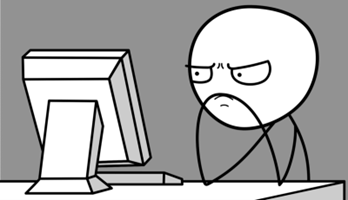

Para hacer un **repaso a los problemas de regresión con ML**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### INTRODUCCIóN: PROCESO DE ML

En los siguientes ejercicios vamos a seguir (de nuevo) los pasos básicos en la creación de un modelo de ML para resolver un problema de predicción a partir de un dataset que incluye el target, es decir, un aprendizaje supervisado.

En concreto, vamos a trabajar sobre un problema de clasificación a través de los siguientes pasos:

1. Entendimiento del problema (selección de la métrica más adecuada)  
2. Obtención de datos y primer contacto  
3. Train y Test  
4. MiniEDA: Análisis del target, análisis bivariante, entendimiento de las features, selección de las mismas (si es necesario)  
5. Preparación del dataset de Train: Conversión de categóricas, tratamiento de numéricas  
6. Selección e instanciación de modelos. Baseline.
7. Comparación de modelos (lo haremos por comparación con validación, puedes hacerlo por comparación de modelos de hiperparámetros optimizados, si así lo prefieres)  
8. Selección de modelo: Optimización de hiperparámetros (ten en cuenta la nota de 7)  
9. Evaluación contra test.  
10. Análisis de errores, posibles acciones futuras.  
11. EXTRA: Persistencia del modelo en disco.  

### El problema de Negocio

El ayuntamiento de Freehold, Nueva Jersey, está preocupado por los niveles de Ozono en situaciones de contaminación. Ha adquirido unos sensores muy potentes que permiten medir la composición de la calidad del aire casi en tiempo real, pero desgraciadamente la medida de Ozono se obtiene mucho más tarde (casi 12 horas después, este dato de las horas no es relevante para el problema). Las medidas son enviadas a una plataforma central donde se quiere incorporar un modelo que en función de esas medidas pueda predecir el nivel de $O_3$ (Ozono) en el aire y establecer alarmas y umbrales para avisar a la población o tomar medidas si es necesaria.

El concejal de urbanismo y tecnología, Bruce S., os contrata para que creéis ese modelo y para ello os suministra un dataset con medidas de la calidad de aire donde han incorporado el nivel de Ozono ("PT08.S5(O3)") posteriormente. Quieren un modelo que se equivoque en media en menos de 100 unidades por millón (la medida en la que tienen registrada la presencia de Ozono).

¡Manos a la obra!

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, mean_absolute_error

### Ejercicio 1: Entendiendo el problema de "Negocio"

En función de la descripción del problema de "negocio" y sin mirar todavía los datos, ¿qué métricas creess más conveniente para medir el rendimiento del modelo a construir y, por tanto, para comparar posibles modelos entre sí?

- MAE

### Ejercicio 2: Obtención y primer "vistazo"

Carga el dataset, muestra sus primeras filas, su descripción general y determina el tipo de variables que vamos a manejar. Escoge el target y crea una variable `target` y asignalé el nombre de la columna correspondiente.

In [3]:
df = pd.read_csv("./data/air_contamination.csv")
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         8991 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       8991 non-null   int64  
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        8991 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        8991 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 913.3 KB


In [5]:
target = "PT08.S5(O3)"

In [6]:
bt.tipifica_variable_plus(df)

Umbral de 'CARD_valores_unicos' para considerarla 'Categórica':  10
Umbral de 'CARD_%' para considerarla 'Numérica Continua':  30.0


,Variable,Missings_%,Dtype_real,CARD_valores_unicos,CARD_%,Dtype_sugerido
0,CO(GT),0.0,float64,95,1.06,Numérica Discreta
1,PT08.S1(CO),0.0,float64,3245,36.09,Numérica Continua
2,NMHC(GT),0.0,int64,428,4.76,Numérica Discreta
3,C6H6(GT),0.0,float64,3772,41.95,Numérica Continua
4,PT08.S2(NMHC),0.0,float64,3772,41.95,Numérica Continua
5,NOx(GT),0.0,float64,2362,26.27,Numérica Discreta
6,PT08.S3(NOx),0.0,float64,3518,39.13,Numérica Continua
7,NO2(GT),0.0,float64,1367,15.20,Numérica Discreta
8,PT08.S4(NO2),0.0,float64,4407,49.02,Numérica Continua
9,PT08.S5(O3),0.0,float64,4678,52.03,Numérica Continua


### Ejercicio 3: Split

Haz el split en train y test.

In [7]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

### Ejercicio 4: MiniEDA (I)

Analiza la distribución del target brevemente.

<Axes: xlabel='PT08.S5(O3)', ylabel='Count'>

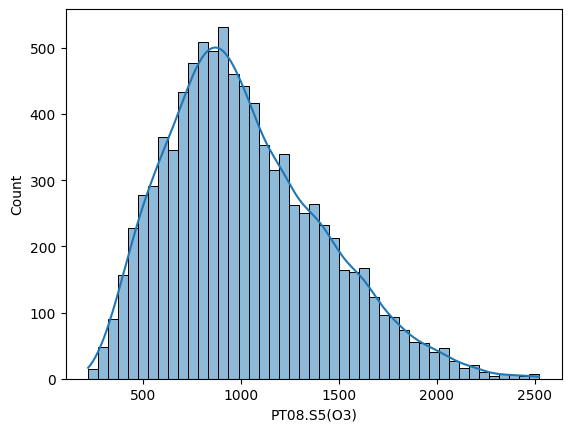

In [8]:
sns.histplot(df[target], kde=True)

### Ejercicio 5: MiniEDA (II)

Analiza bivariantemente las variables contra el target, para las numéricas analiza la correlación numéricamente y gráficamente, para las categóricas analiza la distribución del target para cada valor de la categórica.

1. CORRELACIONES NUMÉRICAMENTE

In [9]:
# tabla con todas las correlaciones (en valores absolutos)
np.abs(train_set[train_set.columns].corr(numeric_only = True))

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.122506,0.129424,0.075437,0.083927,0.537019,0.088243,0.676250,0.054931,0.128110,0.125947,0.019473,0.178433
PT08.S1(CO),0.122506,1.000000,0.243351,0.884962,0.893618,0.567169,0.771052,0.312481,0.679732,0.901005,0.044293,0.117609,0.131040
NMHC(GT),0.129424,0.243351,1.000000,0.132976,0.129683,0.000752,0.053649,0.105388,0.207487,0.110077,0.068982,0.016271,0.125931
C6H6(GT),0.075437,0.884962,0.132976,1.000000,0.981825,0.538124,0.733903,0.264477,0.764999,0.864269,0.193377,0.053293,0.167025
PT08.S2(NMHC),0.083927,0.893618,0.129683,0.981825,1.000000,0.535406,0.795214,0.284718,0.776315,0.879959,0.236493,0.083230,0.185433
NOx(GT),0.537019,0.567169,0.000752,0.538124,0.535406,1.000000,0.504951,0.821307,0.145186,0.623100,0.244188,0.122632,0.203319
PT08.S3(NOx),0.088243,0.771052,0.053649,0.733903,0.795214,0.504951,1.000000,0.289655,0.537843,0.794185,0.144771,0.057839,0.230914
NO2(GT),0.676250,0.312481,0.105388,0.264477,0.284718,0.821307,0.289655,1.000000,0.022972,0.337581,0.139848,0.077195,0.250775
PT08.S4(NO2),0.054931,0.679732,0.207487,0.764999,0.776315,0.145186,0.537843,0.022972,1.000000,0.590688,0.559257,0.029198,0.629302
PT08.S5(O3),0.128110,0.901005,0.110077,0.864269,0.879959,0.623100,0.794185,0.337581,0.590688,1.000000,0.032899,0.133955,0.069113


In [10]:
# Correlaciones numéricas, respecto al target, y ordenadas de mayor a menor

# Calcular la matriz de correlación
corr = train_set.corr(numeric_only=True)

# Ordenar las correlaciones absolutas respecto al target de mayor a menor
np.abs(corr[target]).sort_values(ascending=False)

PT08.S5(O3)      1.000000
PT08.S1(CO)      0.901005
PT08.S2(NMHC)    0.879959
C6H6(GT)         0.864269
PT08.S3(NOx)     0.794185
NOx(GT)          0.623100
PT08.S4(NO2)     0.590688
NO2(GT)          0.337581
RH               0.133955
CO(GT)           0.128110
NMHC(GT)         0.110077
AH               0.069113
T                0.032899
Name: PT08.S5(O3), dtype: float64

2. CORRELACIONES GRÁFICAMENTE
- visualizar la *Colinealidad*

<Axes: >

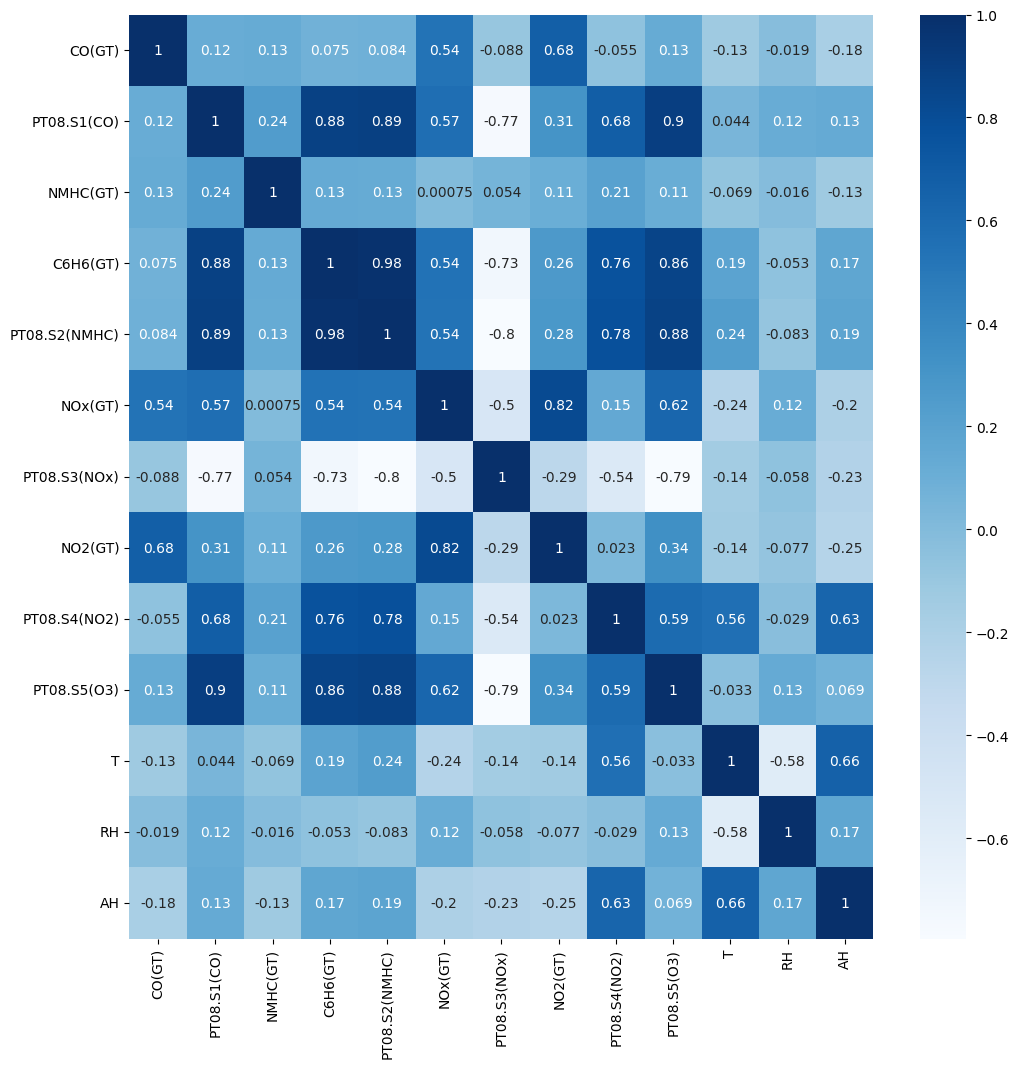

In [11]:
plt.figure(figsize = (12,12))
sns.heatmap(corr, # matriz de correlacion
            annot= True, 
            cmap = "Blues")

### Ejercicio 6: MiniEDA (III)

- Crea una variable de tipo lista a la que asignes los valores de las columnas que creas conveniente emplear como features en función de lo visto en el miniEDA.
- Haz una lista de modelos/algoritmos que vas a emplear para hacer el modelo (solo los nombres). 
- En función de la lista anterior, ¿tienes que tratar las variables, por qué?

In [12]:
# CORRELACIÓN CON TARGET

umbral_target = 0.15  # Ajusta según necesidad
excluidas_corr_target = []

# 1) Seleccionar variables con fuerte correlación con el target
corr = train_set.corr(numeric_only=True)
corr_target = np.abs(corr[target]).sort_values(ascending=False)
print("CORRELACIÓN CON TARGET")
print(corr_target)

features_sel_1 = corr_target[corr_target >= umbral_target].index.tolist()
excluidas_corr_target = corr_target[corr_target < umbral_target].index.tolist()
features_sel_1.remove(target)  # Eliminar la variable objetivo

print(f"\n- Primera FEATURES SELECCIONADAS (sin target):\n {features_sel_1}")
print(f"\n- Primera FEATURES EXCLUIDAS (menores al umbral target de correlación al '{umbral_target}' %):\n {excluidas_corr_target}")

CORRELACIÓN CON TARGET
PT08.S5(O3)      1.000000
PT08.S1(CO)      0.901005
PT08.S2(NMHC)    0.879959
C6H6(GT)         0.864269
PT08.S3(NOx)     0.794185
NOx(GT)          0.623100
PT08.S4(NO2)     0.590688
NO2(GT)          0.337581
RH               0.133955
CO(GT)           0.128110
NMHC(GT)         0.110077
AH               0.069113
T                0.032899
Name: PT08.S5(O3), dtype: float64

- Primera FEATURES SELECCIONADAS (sin target):
 ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'C6H6(GT)', 'PT08.S3(NOx)', 'NOx(GT)', 'PT08.S4(NO2)', 'NO2(GT)']

- Primera FEATURES EXCLUIDAS (menores al umbral target de correlación al '0.15' %):
 ['RH', 'CO(GT)', 'NMHC(GT)', 'AH', 'T']


In [13]:
# MATRIZ CORRELACION completa
#corr = train_set.corr(numeric_only=True)
abs(corr)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.122506,0.129424,0.075437,0.083927,0.537019,0.088243,0.676250,0.054931,0.128110,0.125947,0.019473,0.178433
PT08.S1(CO),0.122506,1.000000,0.243351,0.884962,0.893618,0.567169,0.771052,0.312481,0.679732,0.901005,0.044293,0.117609,0.131040
NMHC(GT),0.129424,0.243351,1.000000,0.132976,0.129683,0.000752,0.053649,0.105388,0.207487,0.110077,0.068982,0.016271,0.125931
C6H6(GT),0.075437,0.884962,0.132976,1.000000,0.981825,0.538124,0.733903,0.264477,0.764999,0.864269,0.193377,0.053293,0.167025
PT08.S2(NMHC),0.083927,0.893618,0.129683,0.981825,1.000000,0.535406,0.795214,0.284718,0.776315,0.879959,0.236493,0.083230,0.185433
NOx(GT),0.537019,0.567169,0.000752,0.538124,0.535406,1.000000,0.504951,0.821307,0.145186,0.623100,0.244188,0.122632,0.203319
PT08.S3(NOx),0.088243,0.771052,0.053649,0.733903,0.795214,0.504951,1.000000,0.289655,0.537843,0.794185,0.144771,0.057839,0.230914
NO2(GT),0.676250,0.312481,0.105388,0.264477,0.284718,0.821307,0.289655,1.000000,0.022972,0.337581,0.139848,0.077195,0.250775
PT08.S4(NO2),0.054931,0.679732,0.207487,0.764999,0.776315,0.145186,0.537843,0.022972,1.000000,0.590688,0.559257,0.029198,0.629302
PT08.S5(O3),0.128110,0.901005,0.110077,0.864269,0.879959,0.623100,0.794185,0.337581,0.590688,1.000000,0.032899,0.133955,0.069113


In [14]:
# MATRIZ CORRELACION solo feater sel
train_set[features_sel_1].corr().abs()

,PT08.S1(CO),PT08.S2(NMHC),C6H6(GT),PT08.S3(NOx),NOx(GT),PT08.S4(NO2),NO2(GT)
PT08.S1(CO),1.000000,0.893618,0.884962,0.771052,0.567169,0.679732,0.312481
PT08.S2(NMHC),0.893618,1.000000,0.981825,0.795214,0.535406,0.776315,0.284718
C6H6(GT),0.884962,0.981825,1.000000,0.733903,0.538124,0.764999,0.264477
PT08.S3(NOx),0.771052,0.795214,0.733903,1.000000,0.504951,0.537843,0.289655
NOx(GT),0.567169,0.535406,0.538124,0.504951,1.000000,0.145186,0.821307
PT08.S4(NO2),0.679732,0.776315,0.764999,0.537843,0.145186,1.000000,0.022972
NO2(GT),0.312481,0.284718,0.264477,0.289655,0.821307,0.022972,1.000000


In [15]:
# COLINEALIDAD

# Definir umbral de colinealidad
umbral_colinealidad = 0.7  # Ajusta según necesidad

# Filtrar la matriz de correlación solo con las features seleccionadas
corr_features = train_set[features_sel_1].corr().abs()

# Obtener pares de variables altamente correlacionadas
colineales = []
for i in range(len(features_sel_1)):
    for j in range(i + 1, len(features_sel_1)):  
        if corr_features.iloc[i, j] >= umbral_colinealidad:
            colineales.append((features_sel_1[i], features_sel_1[j], corr_features.iloc[i, j]))

# Crear DataFrame con los pares de variables colineales
df_colineales = pd.DataFrame(colineales, columns=["Feature_1", "Feature_2", "Correlacion"])
df_colineales["Correlacion"] = df_colineales["Correlacion"].round(2)

# Mostrar resultado
df_colineales

,Feature_1,Feature_2,Correlacion
0,PT08.S1(CO),PT08.S2(NMHC),0.89
1,PT08.S1(CO),C6H6(GT),0.88
2,PT08.S1(CO),PT08.S3(NOx),0.77
3,PT08.S2(NMHC),C6H6(GT),0.98
4,PT08.S2(NMHC),PT08.S3(NOx),0.80
5,PT08.S2(NMHC),PT08.S4(NO2),0.78
6,C6H6(GT),PT08.S3(NOx),0.73
7,C6H6(GT),PT08.S4(NO2),0.76
8,NOx(GT),NO2(GT),0.82


In [16]:
# Paso 1: Crear una lista vacía para almacenar las variables colineales
list_colineales = []

# Paso 2: Iterar sobre los pares de variables colineales
for pair in colineales:
    feature_1 = pair[0]  # Primera variable del par
    feature_2 = pair[1]  # Segunda variable del par

    # Paso 3: Agregar las variables a la lista
    list_colineales.append(feature_1)
    list_colineales.append(feature_2)

# Paso 4: Eliminar duplicados convirtiendo la lista en un conjunto y luego de vuelta a lista
list_colineales = list(set(list_colineales))

# Mostrar el resultado final
print("Lista de features con alta colinealidad:")
print(list_colineales)

Lista de features con alta colinealidad:
['PT08.S3(NOx)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S1(CO)', 'NO2(GT)', 'NOx(GT)']


In [17]:
# SELECCIÓN DE AQUELLAS CON CORRELACIÓN MAS ALTA CON TARGET

# Ordenar por correlación con target
corr_target = np.abs(train_set.corr()[target]).sort_values(ascending=False)

# Lista de variables a excluir
descartadas = []

# Revisar pares colineales y excluir la menos correlacionada con el target
for _, row in df_colineales.iterrows():
    f1, f2 = row["Feature_1"], row["Feature_2"]
    if f1 not in descartadas and f2 not in descartadas:
        if corr_target[f1] >= corr_target[f2]:
            descartadas.append(f2)
        else:
            descartadas.append(f1)

# Obtener las features finales
set_reducido = [f for f in features_sel_1 if f not in descartadas]

excluidas_final = list(descartadas) + list(excluidas_corr_target)

# Mostrar resultados
print(f"\nVariables analizadas por alta colinealidad:\n{list_colineales}")
print(f"\nVariables DESCARTADAS (alta colinealidad pero su par tiene mayor correlación con target):\n{descartadas}")
print("\n\n_ _ _ _ _ _ _ RESUMEN _ _ _ _ _ _ _ ")
print(f"\nFeatures EXCLUIDAS por baja correlación con target:\n{excluidas_corr_target}")
print(f"\nFeatures alta correlación:\n{features_sel_1}")
print(f"\nFEATURES -> Total de {len(list(train_set.columns.drop(target)))} features (todas, sin target):\n{list(train_set.columns.drop(target))}")
print(f"\nSET REDUCIDO-> {len(set_reducido)} variables seleccionadas:\n{set_reducido}")
print(f"\nEXCLUIDAS -> Un total de {len(excluidas_final)} variables finales excluidas (descartadas y excluidas previamente):\n{excluidas_final}")
print(f"\nTARGET:\n'{target}'")



Variables analizadas por alta colinealidad:
['PT08.S3(NOx)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S1(CO)', 'NO2(GT)', 'NOx(GT)']

Variables DESCARTADAS (alta colinealidad pero su par tiene mayor correlación con target):
['PT08.S2(NMHC)', 'C6H6(GT)', 'PT08.S3(NOx)', 'NO2(GT)']


_ _ _ _ _ _ _ RESUMEN _ _ _ _ _ _ _ 

Features EXCLUIDAS por baja correlación con target:
['RH', 'CO(GT)', 'NMHC(GT)', 'AH', 'T']

Features alta correlación:
['PT08.S1(CO)', 'PT08.S2(NMHC)', 'C6H6(GT)', 'PT08.S3(NOx)', 'NOx(GT)', 'PT08.S4(NO2)', 'NO2(GT)']

FEATURES -> Total de 12 features (todas, sin target):
['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH']

SET REDUCIDO-> 3 variables seleccionadas:
['PT08.S1(CO)', 'NOx(GT)', 'PT08.S4(NO2)']

EXCLUIDAS -> Un total de 9 variables finales excluidas (descartadas y excluidas previamente):
['PT08.S2(NMHC)', 'C6H6(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'RH', 'CO(GT)', 'N

*En esta ocasión nos vamos a centrar en los regresores basados en ensamblados de árboles (**random forest, Xgboost, etc**), así que no necesitaremos escalar nuestras features, ya que los árboles en los que se basan no son sensibles a las escalas de las variables*

### Ejercicio 7: Tratamiento de features

Trata las features de manera que puedan ser empleadas por los modelos que escogite en el ejercicio anterior. Recuerda que este es un paso necesario porque los modelos no entienden de primeras de "letras" (salvo alguno que no es que entienda sino que hace sus transformaciones por dentro) y porque en determinados algoritmos es necesario que los rangos de las features estén escalados para que el algoritmo no se decante (érroneamente) por alguna feature sólo porque sus valores son mayores en rango que el de otras. NOTA: Recuerda que lo que le hagas al train, se lo tienes que hacer al test

In [18]:
# no necesario

### Ejercicio 8: Creación de los dataset de train y test

Crea las parejas X,y de train y test.

In [19]:
features = train_set.columns.to_list()
features.remove(target)

features_alta_corr = features_sel_1

set_reducido

['PT08.S1(CO)', 'NOx(GT)', 'PT08.S4(NO2)']

In [20]:
# Crear las listas X_train, X_test según las nuevas categorías

# TRAIN SET
X_train_alta_corr = train_set[features_alta_corr]  # Características con alta correlación
X_train_baja_corr = train_set[set_reducido]  # reducido
X_train_all = train_set[features]  # Conjunto de todas las features

y_train = train_set[target]  # Target

# TEST SET
X_test_alta_corr = test_set[features_alta_corr]  # Características con alta correlación
X_test_baja_corr = test_set[set_reducido]  # reducido
X_test_all = test_set[features]  # Conjunto de todas las features

y_test = test_set[target]  # Target

### Ejercicios 9:

Importa e instancia los modelos que hayas escogido en el ejercicio 6. En general, no hace falta que asignes ahora ningún hiperparámetro salvo en los basados en árboles en los que debes escoger un max_depth para evitar el sobreajuste inicial. 

In [21]:
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

rf_reg = RandomForestRegressor(max_depth = 10, random_state= 42) # El número de niveles para "probar" lo pongo más alto que en clasificación porque el rango de valores de la target es mucho mayor
xgb_reg = XGBRegressor(max_depth = 10, random_state = 42)
lgb_reg = LGBMRegressor(max_depth = 10, random_state = 42, verbose = -100)


modelos = {
    "Random Forest": rf_reg,
    "Lightgbm": lgb_reg,
    "XGBoost": xgb_reg
}

### Ejercicio 10: Comparativa de modelos

Haz la comparativa de modelos empleando cross_val_score (es decir la validación cruzada). Utiliza k = 5, y un scoring acorde a la métrica escogida en el ejercicio 1. Si no tienes clara la métrica entonces emplea "mean_absolute_error" (recuerda el funcionamiento del scoring en "sklearn", no te valdrá poner "mean_absolute_error"). Escoge el modelo ganador.

In [22]:
feature_sets = {
    "Alta correlación": (X_train_alta_corr),
    "Baja correlación": (X_train_baja_corr),
    "Todas las features": (X_train_all)
}

In [23]:
# Diccionario para almacenar los mejores resultados
resultados = {}
mejores_resultados = {}


for feature_set, X_train in feature_sets.items():
    
    print(f"'{feature_set}'")
    
    for tipo, modelo in modelos.items():
        
        scores = np.mean(cross_val_score(modelo, 
                                      X_train, 
                                      y_train, 
                                      cv = 5, 
                                      scoring = "neg_mean_absolute_error"))
        mae_medio = -np.mean(scores)  # Se multiplica por -1 porque 'neg_mean_absolute_error' devuelve valores negativos
        print(f"  {tipo}: MAE Medio = {mae_medio:.4f}")
        mejores_resultados[tipo] = mae_medio

        # Mejor resultado del modelo
        mejor_modelo = min(mejores_resultados, key=mejores_resultados.get)
        resultados[feature_set] = (mejor_modelo, mejores_resultados[mejor_modelo])

    print(" ")

'Alta correlación'
  Random Forest: MAE Medio = 96.3081
  Lightgbm: MAE Medio = 96.2609
  XGBoost: MAE Medio = 96.9815
 
'Baja correlación'
  Random Forest: MAE Medio = 106.8081
  Lightgbm: MAE Medio = 106.9713
  XGBoost: MAE Medio = 117.2705
 
'Todas las features'
  Random Forest: MAE Medio = 82.4130
  Lightgbm: MAE Medio = 78.3216
  XGBoost: MAE Medio = 78.9118
 


In [24]:
# Mostrar el mejor resultado por modelo
print("\n🏆 Mejor score (MAE) por modelo:")
for feature_set, (modelo, score) in resultados.items():
    print(f"'{feature_set}': '{modelo}' -> MAE = {score:.4f}")


🏆 Mejor score (MAE) por modelo:
'Alta correlación': 'Lightgbm' -> MAE = 96.2609
'Baja correlación': 'Random Forest' -> MAE = 106.8081
'Todas las features': 'Lightgbm' -> MAE = 78.3216


### Ejercicio 11: Ajuste de hiperparámetros

- Escoge un grid para ajustar los hiperparámetros de tu modelo. 
- Crea un objeto GridSearch y "ajustalo" (emplea su método fit) para encontrar la mejor combinaciónde hiperparámetros empleando la métrica que decidimos en el ejercio 1. Si no lo tienes claro emplea "mean absolute error". 

In [25]:
param_grid = {
        "num_leaves": [10, 20, 30],
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [50, 100, 200],
    }

lgb_grid = GridSearchCV(lgb_reg,
                       param_grid= param_grid,
                       cv = 5,
                       scoring = "neg_mean_absolute_error")

lgb_grid.fit(X_train_all, y_train) 

GridSearchCV(cv=5,
             estimator=LGBMRegressor(max_depth=10, random_state=42,
                                     verbose=-100),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [10, 20, 30]},
             scoring='neg_mean_absolute_error')

### Ejercicio 12: Evaluación del modelo

Evalúa el modelo contra el dataset de test. Muestra el informe de clasificación y haz una valoración de si el hospital aceptaría el modelo o no.

In [27]:
from sklearn.metrics import mean_squared_error

y_pred = lgb_grid.best_estimator_.predict(X_test_all)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 73.69275349534375
RMSE: 102.82197606854801


¿Cómo evaluar estos valores?
1. Si el MAE y RMSE son bajos en comparación con el rango de precios del dataset, el modelo es bueno.
2. La diferencia entre MAE y RMSE sugiere la presencia de outliers o predicciones con grandes errores.
    - Si RMSE fuera similar al MAE, los errores estarían distribuidos uniformemente.
    - Al ser mayor, indica algunos errores grandes que afectan más el RMSE.

### Ejercicio 13: Análisis de errores

Comparar los valores predichos contra los reales mediante una gráfica (puedes emplear la función que empleamos en el workout de la unidad anterior). Haz un pequeño análisis.

In [28]:

def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

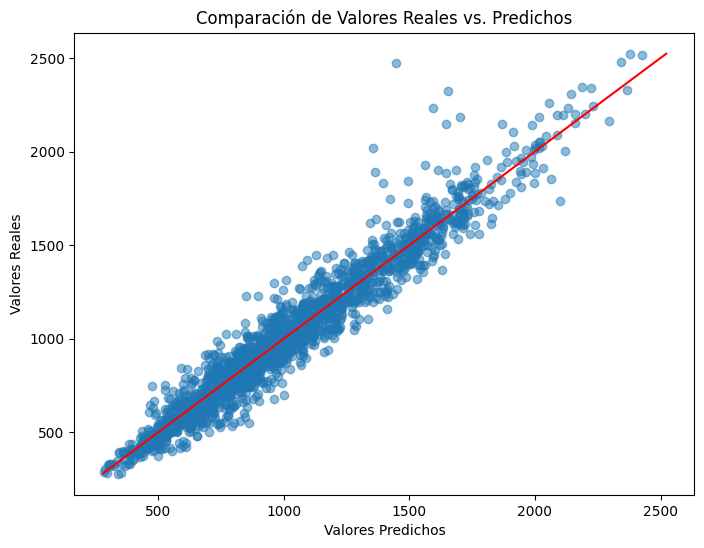

In [29]:
plot_predictions_vs_actual(y_test, y_pred)

### EXTRA: 

Busca en Internet o pregúntale a tu AI preferida, cómo se graba un modelo en disco y gúardalo en "./models/o3_pred" con la extesión apropiada.